## Assignment 3: Web Scraping

For this assignment, you are required to scrape data from e-commerce or other websites such as [Lelong](http://www.lelong.com.my), [Lazada](http://www.lazada.com.my/), [Mudah](http://www.mudah.my/), [iProperty](https://www.iproperty.com.my/), [Booking](http://www.booking.com), [Expedia](https://www.expedia.com.my/) etc.

You are required to fork this Jupyter Notebook from my Github [here](https://github.com/kuanhoong/EDS-Assignment3 ) and then scrape the latest 1000 items from one of the website mentioned above. The scraped data should include:

* Product Name/Product Title
* Amount/Price
* Brand
* Comments/Reviews
* Number of views

In addition, you are required to export the scraped data to dataframe format and also save a copy in csv format. Upon successful extracting data to dataframe, you are required to do a data analysis on the data. 

Your analysis should provide answers to the following questions:
* What do you think is interesting about this data? Tell a story about some interesting thing you have discovered by looking at the data.
* Visualize your data with matplotlib or with folium library package.

For example, you might consider whether there is a difference in pricings at different times doing the day or city, or whether other factors that influnced the pricings etc. Another thing you might consider is whether there is a relationship between the pricing and number of reviews or comments.

Show your analysis workflow in your Jupyter notebook.

The final submission should be pushed back to your respective Github account.

### Folium

[Folium](https://github.com/python-visualization/folium) makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

In [1]:
import pandas as pd
import re
import numpy as np
import folium
import matplotlib.pyplot as plt
%matplotlib inline
from bs4 import BeautifulSoup
import requests

In [ ]:
mapit = None
latlon = [ (3.144473, 101.708722), (3.144473, 101.708722),(3.135732, 101.686989),(2.992861, 101.792900)]
for coord in latlon:
    mapit = folium.Map( location=[ coord[0], coord[1] ] )
    folium.Marker([3.144473, 101.708722], icon=folium.Icon(color='blue',icon='star'), popup='Federal Hotel').add_to(mapit)
    folium.Marker([3.156374, 101.714579], icon=folium.Icon(color='green',icon='info-sign') , popup='Mandarin Oriental').add_to(mapit)
    folium.Marker([3.135732, 101.686989], icon=folium.Icon(color='red',icon='star') , popup='Le Meridien').add_to(mapit)
    folium.Marker([2.992861, 101.792900], icon=folium.Icon(color='red',icon='info-sign') , popup='Hospital Kajang').add_to(mapit)
mapit

In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode('Hospital Kajang')
print(location.address)
print((location.latitude,location.longitude))

In [ ]:
# scrape from lelong

# find the pattern for the first page
url = 'https://www.lelong.com.my/catalog/all/list?TheKeyword=ipad+pro&D='

# write a loop to scrape from page 1 to the last page

product_name=[]
price=[]
for page in range(1,2): # 8 pages, 9 not included, always test on 2 first
    url_page = url+str(page)
    #print(url_page) # check if get correct address
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    #print(soup)
    link = soup.find_all('div',{'class':'item','class':'summary'})
    link1= soup.find_all('div',{'class':'col total'})
    #print(link) 
    length = len(link) #got 60 items
    #print(length) #for every link, i am going to look for th product name
    #print(link[0]) #write a for loop to get all the name from this
    for i in range(0,length): #0-59 got 60 item
        name = link[i].a.get('title')
        prices = link1[i].b.string
        product_name.append(name)
        price.append(prices) #create a list and add to it
        
price

In [ ]:
# write to csv
# convert the list to a pandas dataframe

df = pd.DataFrame({'name':product_name, 'price':price})
df['price']= df['price'].str.replace('RM ','')
df.to_csv('output.csv', index=False)



In [2]:
#Garrick

# scrape from lelong

#PowerBank Price according to sellers from KL

url = 'https://www.lelong.com.my/catalog/all/list/?TheKeyword=power+bank&StateID=1&D='

name=[]
price=[]
seller=[]
view=[]
sold= []


for page in range(1,23): 
    url_page = url+str(page)
    scrape = requests.get(url_page)
    soup = BeautifulSoup(scrape.content, 'lxml')
    link = soup.find_all('div',{'class':'item','class':'summary'})
    link1= soup.find_all('div',{'class':'col total'})
    #link2= soup.find_all('div',{'class':'seller inline-block'})
    link3= soup.find_all('span',{'class':'hit fontsize12'})
    link4= soup.find_all('div',{'class':'pic-box'})
    length = len(link) 
    
    for i in range(0,length): 
        names = link[i].a.get('title')
        prices = link1[i].b.string
        if(link[i].find('div',class_="seller inline-block") is None):
            seller.append('NoName')
        else:
            seller.append(link[i].find('div',class_="seller inline-block").span.a.get_text())  
        views= link3[i].string
        name.append(names)
        price.append(prices) 
        view.append(views)
        if(link4[i].find('span',class_="list-sold") is None):
            sold.append('0')
        else:
            sold.append(link4[i].get_text())


In [3]:
#Save to CSV

df = pd.DataFrame({'name':name, 'price':price, 'seller':seller, 'view':view, 'sold':sold})
#Clean Price
df['price']= df['price'].str.replace('RM ','')
#Clean View
df['view']=df['view'].str.replace(r"\(*","")
df['view']=df['view'].str.replace(r"\)*","")
df['view']=df['view'].str.replace('\r\n','')
df['view']=df['view'].str.replace(' ','')
df['view']=df['view'].str.replace('View','')
#Clean Sold
df['sold']=df['sold'].str.replace('\n','')
df['sold']=df['sold'].str.replace(' ','')
df['sold']=df['sold'].str.replace('Sold','')
df.price = df.price.astype(float)
df.view = df.view.astype(int)
df.sold = df.sold.astype(int)
df.price.replace('0', np.nan)

df.to_csv('power.csv', index=False)

In [4]:
#Seller Information
print('Total Seller')
print(df.seller.count())
print()

print('Seller Names')
print(df.seller.unique())
print()

print('Total Unique Seller')
print(len(df.seller.unique()))
print()


Total Seller
1281

Seller Names
['OneApple ' 'MMSRetail ' 'thengst ' 'ecuberetail ' 'unipro '
 'eMonsterDigital ' 'mmsretails01 ' 'xsoho ' 'eBestSeller ' 'chriss79 '
 'limgrouptrading ' 'tybluetech ' 'chocobozz ' 'tetrahedron ' 'ecgrab '
 'WapInTeleshop ' 'dcswebstore ' 'Chocobozz ' 'winsonyap86 ' 'borongstore '
 'xmmx ' 'MoreVision ' 'borong2u ' 'kwingcollection ' 'ONAKMOBILE '
 'Dprovider ' 'hypetech ' 'JustbuyMalaysia ' 'Hello2U ' 'myipmart '
 '2by2mobile ' 'GBonline ' 'BananaMilkC ' 'lemonbread ' 'alerisx '
 'cwchoo85 ' 'castleIT ' 'addonliving ' 'FotoShangriLa ' 'kys_auto '
 'LittleatSasa ' 'myitcomputer ' 'movegift ' 'bee ' 'QineticLife '
 'DigitalsMania ' 'ladivafestiva ' 'linguine827 ' 'rhythm6 '
 'myeasygadget ' 'crazyboy7777 ' 'zoeempire ' 'mygameshop '
 'vkmobilegadget ' 'cmnmobile ' 'gadgetbin ' 'lay1211 ' 'dashermart '
 'verykeat ' 'Dfaro ' 'AutoFans ' 'atostore ' 'infinityelink ' 'cavarii '
 'SMARTSS ' 'gadgetzone6 ' 'jayacom ' 'Flashtrend ' '1StopDeal ' 'lover88 '
 'jenn

In [5]:
#Seller Sales Post Count
print(df['seller'].value_counts())


castleIT             147
SMARTSS               98
chocobozz             83
borongstore           64
myeasygadget          59
cmnmobile             52
NoName                45
ONAKMOBILE            36
movegift              36
wesave                30
JustbuyMalaysia       29
myipmart              24
ginnieooi             23
MyMobius              22
xsoho                 21
infinityelink         18
tetrahedron           18
BananaMilkC           16
ecuberetail           15
MMSRetail             15
dashermart            14
winsonyap86           13
darenthee             12
speedysend            12
eMonsterDigital       11
atostore              11
unipro                11
FotoShangriLa         11
Flashtrend            11
gadgetzone6            9
                    ... 
bagstation             1
maisondeluxe           1
truegamers             1
cavarii                1
SatuGadgetDotCom       1
nkloong08              1
louis230972            1
DelphinusGifts         1
benben001              1


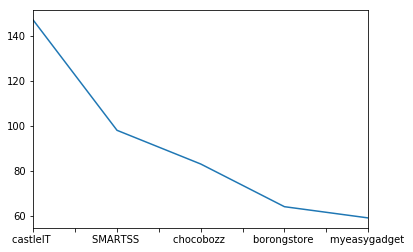

In [6]:
df['seller'].value_counts().head(5).plot();

In [7]:
df.groupby(['seller', 'price'])['sold'].count()

seller             price 
12volts            115.54    1
                   252.28    2
                   253.34    1
1StopDeal          44.90     1
                   79.90     1
                   85.90     1
2by2mobile         85.00     1
5151WORNALL        2.40      1
                   23.00     1
                   25.00     1
                   38.00     1
AlwaysLowPrices    49.00     4
Aurous             199.00    1
AutoFans           480.00    1
BananaMilkC        36.00     1
                   44.90     1
                   45.00     5
                   46.00     2
                   48.00     1
                   60.00     1
                   65.00     1
                   109.00    1
                   129.00    1
                   149.00    1
                   229.00    1
BrightstarOnline   67.00     1
                   82.00     1
                   86.00     1
                   91.00     1
Chocobozz          40.28     1
                            ..
xsoho        

In [8]:
df.loc[:,['price','view','sold']].describe()

,price,view,sold
count,1281.000000,1281.000000,1281.000000
mean,105.139157,678.629196,6.173302
std,70.949316,2264.013995,55.580780
min,0.000000,0.000000,0.000000
25%,58.800000,59.000000,0.000000
50%,85.000000,145.000000,0.000000
75%,129.300000,436.000000,0.000000
max,581.940000,30192.000000,1723.000000


In [9]:
#Top 5 Viewed
df.sort_values('view', ascending=False).head()

,name,price,seller,sold,view
1,100% Original Pineng Powerbank Pn969 Pn-969 20...,68.0,MMSRetail,29,30192
1211,STOCK CLEARANCE PROMOTION !!!! YOOBAO POWER BA...,25.0,infinityelink,216,30170
1195,ORIGINAL PINENG 20000MAH PN-999 POWER BANK,73.0,MyShop8,94,30042
383,PINENG 10000mAh PN968 Power Bank 100% Original...,54.0,dashermart,1723,30014
1230,[Buy1Free1]Super Slim Aluminium Polymer Power ...,99.0,GoBorong,228,16879


In [10]:
#Top 5 Purchased
df.sort_values('sold', ascending=False).head()

,name,price,seller,sold,view
383,PINENG 10000mAh PN968 Power Bank 100% Original...,54.00,dashermart,1723,30014
1155,Xiaomi 5000/10400/10000/16000mAh Power Bank Si...,2.99,Store7teen,520,4874
424,100% Genuine REMAX 6000mAh Super alloy Dual US...,85.90,1StopDeal,339,1557
9,100% ORIGINAL PINENG POWERBANK POWER BANK PN95...,34.00,MMSRetail,265,14844
8,Original Mi Ver 2 PowerBank XiaoMi 10000mAh Ve...,64.00,MMSRetail,252,9783


105.13915690866486

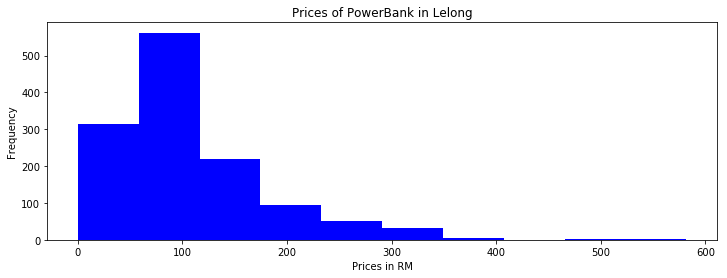

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
x = df.price
plt.hist(x, facecolor='blue')
plt.xlabel('Prices in RM')
plt.ylabel('Frequency')
plt.title('Prices of PowerBank in Lelong')

#Can see the Price is around RM105
df.price.mean()

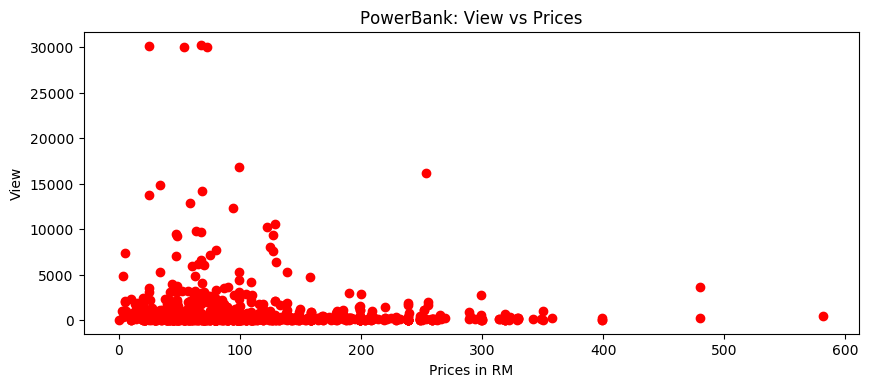

In [12]:
fig, axes = plt.subplots(figsize=(10,4), dpi=100)
x=df.price
y=df.view

axes.scatter(x,y,color='r')
axes.set_title("PowerBank: View vs Prices")
axes.set_xlabel("Prices in RM")
axes.set_ylabel("View");

#More views below RM200

(0, 1000)

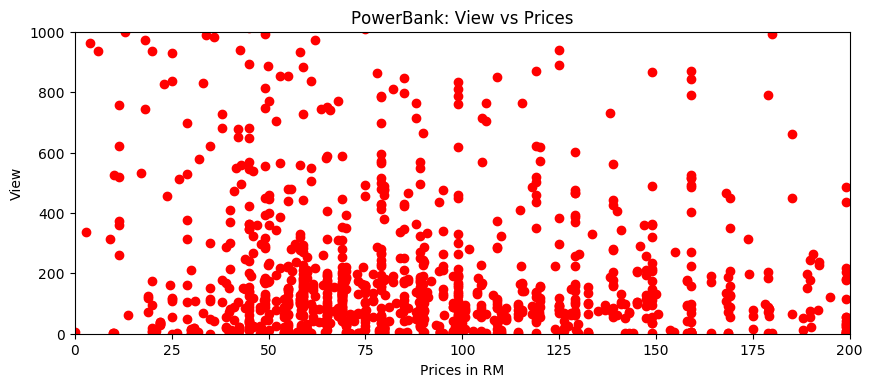

In [13]:
fig, axes = plt.subplots(figsize=(10,4), dpi=100)
x=df.price
y=df.view
axes.scatter(x,y,color='r')
axes.set_title("PowerBank: View vs Prices")
axes.set_xlabel("Prices in RM")
axes.set_ylabel("View")
axes.set_xlim(0,200)
axes.set_ylim(0,1000)


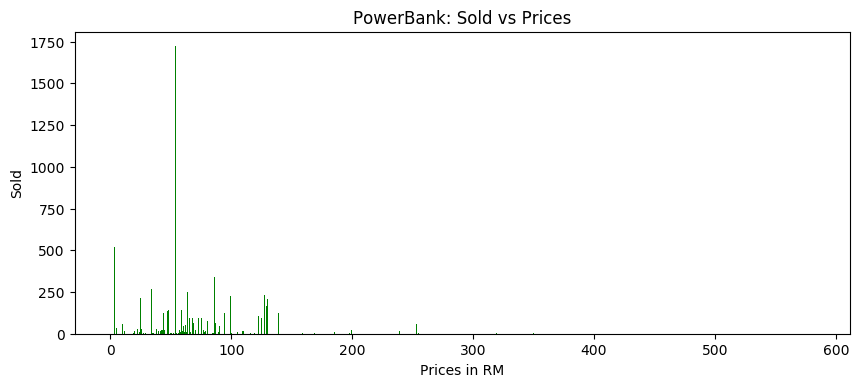

In [14]:
fig, axes = plt.subplots(figsize=(10,4), dpi=100)
x=df.price
z=df.sold
axes.bar(x,z,color='g')
axes.set_title("PowerBank: Sold vs Prices")
axes.set_xlabel("Prices in RM")
axes.set_ylabel("Sold");

#Mostly sold around RM40-RM150